## Importation des librairies

In [666]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from scipy import spatial,stats
import missingno as msno
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import bartlett
from scipy.stats import shapiro
from scipy.stats import kstest
from scipy.stats import f_oneway
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.decomposition import PCA
import qrcode
import warnings
warnings.filterwarnings('ignore')


## Analyse et distribution des valeurs

### Carte de chaleur des corrélations des nutriments

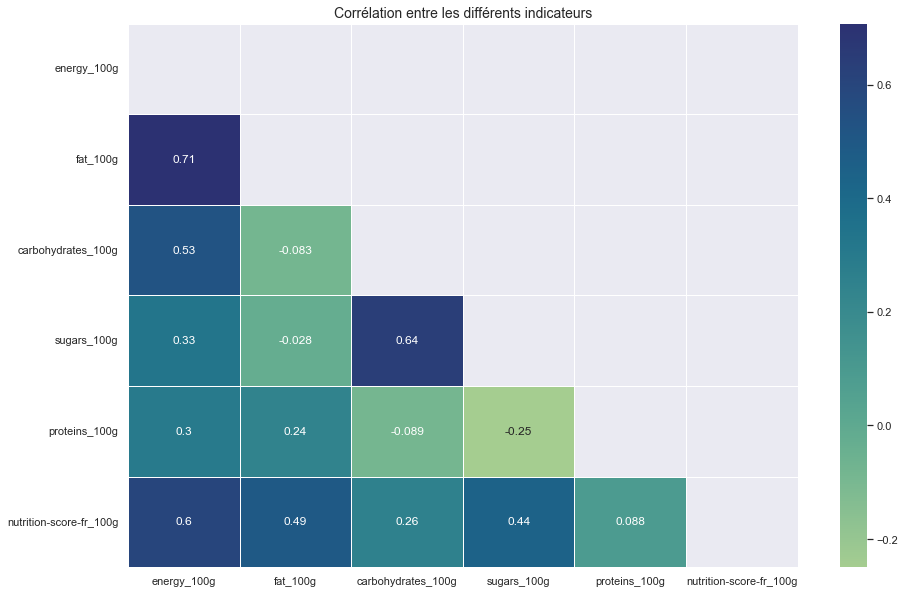

In [718]:
plt.figure(figsize=(15,10))
matrix = np.triu(food_modif_knn.corr())
sns.heatmap(food_modif_knn.corr(),cmap='crest',annot=True,linewidth=.5,mask=matrix )
plt.title('Corrélation entre les différents indicateurs',size = 14)
plt.show()

In [719]:
food_modif_knn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 248657 entries, 1 to 320771
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   energy_100g              248657 non-null  float64
 1   fat_100g                 248657 non-null  float64
 2   carbohydrates_100g       248657 non-null  float64
 3   sugars_100g              248657 non-null  float64
 4   proteins_100g            248657 non-null  float64
 5   nutrition-score-fr_100g  248657 non-null  float64
dtypes: float64(6)
memory usage: 13.3 MB


### Distribution de chaque valeur

In [720]:
# Kolmogorov-Smirnov
alpha= 0.05
print('HYPOTHESE NULLE : la caractéristique étudiée suit une distribution normale.\n')

for i in range(len(food_modif_knn.columns)): 
    
    D, pval = stats.kstest(food_modif_knn[food_modif_knn.columns[i]], 'norm')
    print("D = {}\nP_value= {}".format(D,pval))
    if pval<alpha: 
        print("P_value est plus basse que alpha ({}) on peut rejeter l'hypothèse nulle\n => {} ne suit pas une distribution normale"
              .format(alpha,food_modif_knn.columns[i]))
    else : 
        print("on ne peut pas rejeter l'hypothèse nulle")


HYPOTHESE NULLE : la caractéristique étudiée suit une distribution normale.

D = 0.9724002329474718
P_value= 0.0
P_value est plus basse que alpha (0.05) on peut rejeter l'hypothèse nulle
 => energy_100g ne suit pas une distribution normale
D = 0.6353474278899118
P_value= 0.0
P_value est plus basse que alpha (0.05) on peut rejeter l'hypothèse nulle
 => fat_100g ne suit pas une distribution normale
D = 0.8621913851172035
P_value= 0.0
P_value est plus basse que alpha (0.05) on peut rejeter l'hypothèse nulle
 => carbohydrates_100g ne suit pas une distribution normale
D = 0.6888284682923126
P_value= 0.0
P_value est plus basse que alpha (0.05) on peut rejeter l'hypothèse nulle
 => sugars_100g ne suit pas une distribution normale
D = 0.6800748620563273
P_value= 0.0
P_value est plus basse que alpha (0.05) on peut rejeter l'hypothèse nulle
 => proteins_100g ne suit pas une distribution normale
D = 0.7341197731821811
P_value= 0.0
P_value est plus basse que alpha (0.05) on peut rejeter l'hypothès

POUR TOUTES DES ANALYSES ,IL FAUDRA FAIRE DES TESTS STATISTIQUES NON-PARAMETRIQUES

### Test statistique de spearman entre nutrition score et energy

In [721]:
## On pose les hypothèses de départ :
# H0 : Variables indépendantes si p-value > 5%
# H1 : Variables non indépendantes si p-value < 5%

coef, p = spearmanr(food_modif_knn['nutrition-score-fr_100g'],food_modif_knn['energy_100g'])
print(coef,p)
print('coefficient de correlation Spearmans: %.3f' % coef)
alpha = 0.05
if p > alpha:
	print('les echantillons ne sont pas corrélés (ne pas rejeter H0) p=%.3f' % p)
else:
	print('les echantillons sont corrélés (rejeter H0) p=%.3f' % p)    

0.6009165528384437 0.0
coefficient de correlation Spearmans: 0.601
les echantillons sont corrélés (rejeter H0) p=0.000


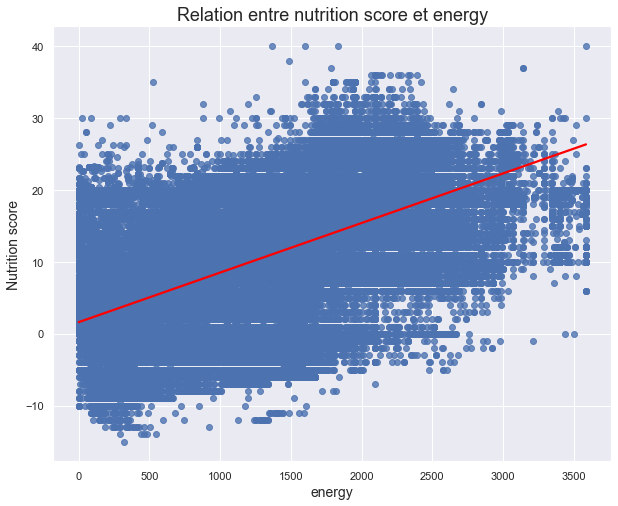

In [722]:
plt.figure(figsize=(10,8))
sns.regplot(y=food_modif_knn['nutrition-score-fr_100g'], x=food_modif_knn["energy_100g"],ci = None,line_kws = {"color": "red"})
plt.title("Relation entre nutrition score et energy",size=18)
plt.ylabel("Nutrition score",size=14)
plt.xlabel("energy",size=14)
plt.show()

### test non parametrique de spearman entre nutrition score et fat

In [723]:
### On pose les hypothèses de départ :
# H0 : Variables indépendantes si p-value > 5%
# H1 : Variables non indépendantes si p-value < 5%

coef, p = spearmanr(food_modif_knn['nutrition-score-fr_100g'],food_modif_knn['fat_100g'])
print(coef,p)
print('coefficient de correlation Spearmans: %.3f' % coef)
alpha = 0.05
if p > alpha:
	print('les echantillons ne sont pas corrélés (ne pas rejeter H0) p=%.3f' % p)
else:
	print('les echantillons sont corrélés (rejeter H0) p=%.3f' % p)

0.5247325829136328 0.0
coefficient de correlation Spearmans: 0.525
les echantillons sont corrélés (rejeter H0) p=0.000


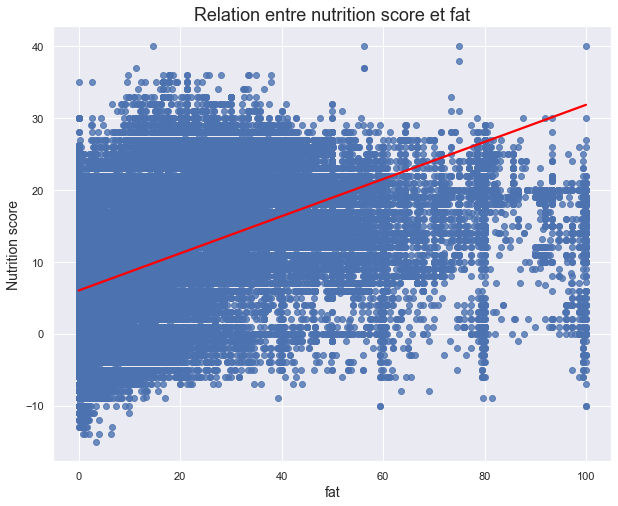

In [724]:
plt.figure(figsize=(10,8))
sns.regplot(y=food_modif_knn['nutrition-score-fr_100g'], x=food_modif_knn["fat_100g"],ci = None,line_kws = {"color": "red"})
plt.title("Relation entre nutrition score et fat",size=18)
plt.ylabel("Nutrition score",size=14)
plt.xlabel("fat",size=14)
plt.show()

### Test statistique entre Nutrition score et sugars

In [725]:
### On pose les hypothèses de départ :
# H0 : Variables indépendantes si p-value > 5%
# H1 : Variables non indépendantes si p-value < 5%

coef, p = spearmanr(food_modif_knn['nutrition-score-fr_100g'],food_modif_knn['sugars_100g'])
print(coef,p)
print('coefficient de correlation Spearmans: %.3f' % coef)
alpha = 0.05
if p > alpha:
	print('les echantillons ne sont pas corrélés (ne pas rejeter H0) p=%.3f' % p)
else:
	print('les echantillons sont corrélés (rejeter H0) p=%.3f' % p)

0.36456808487273573 0.0
coefficient de correlation Spearmans: 0.365
les echantillons sont corrélés (rejeter H0) p=0.000


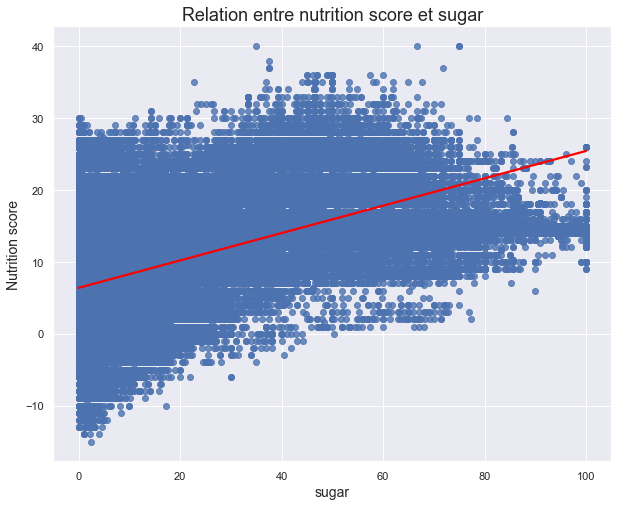

In [726]:
plt.figure(figsize=(10,8))
sns.regplot(y=food_modif_knn['nutrition-score-fr_100g'], x=food_modif_knn["sugars_100g"],ci = None,line_kws = {"color": "red"})
plt.title("Relation entre nutrition score et sugar",size=18)
plt.ylabel("Nutrition score",size=14)
plt.xlabel("sugar",size=14)
plt.show()

### Test statistique en energy et fat

In [727]:
### On pose les hypothèses de départ :
# H0 : Variables indépendantes si p-value > 5%
# H1 : Variables non indépendantes si p-value < 5%

coef, p = spearmanr(food_modif_knn['energy_100g'],food_modif_knn['fat_100g'])
print(coef,p)
print('coefficient de correlation Spearmans: %.3f' % coef)
alpha = 0.05
if p > alpha:
	print('les echantillons ne sont pas corrélés (ne pas rejeter H0) p=%.3f' % p)
else:
	print('les echantillons sont corrélés (rejeter H0) p=%.3f' % p)

0.7031539974470684 0.0
coefficient de correlation Spearmans: 0.703
les echantillons sont corrélés (rejeter H0) p=0.000


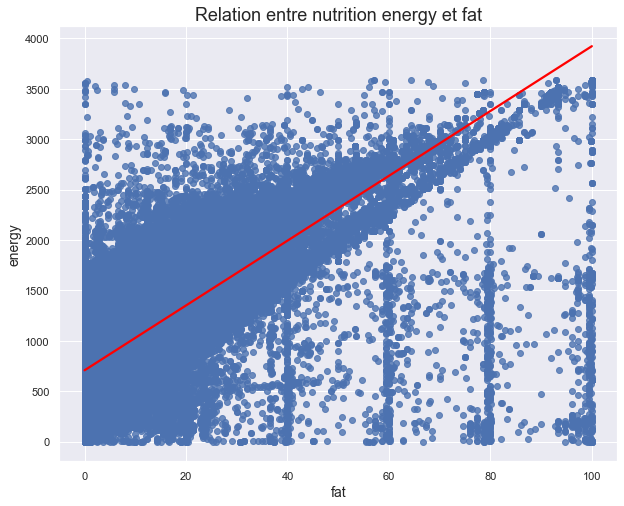

In [728]:
plt.figure(figsize=(10,8))
sns.regplot(y=food_modif_knn['energy_100g'], x=food_modif_knn["fat_100g"],ci = None,line_kws = {"color": "red"})
plt.title("Relation entre nutrition energy et fat",size=18)
plt.ylabel("energy",size=14)
plt.xlabel("fat",size=14)
plt.show()

### Test statistique entre sugars et carbonhydrates

In [729]:
### On pose les hypothèses de départ :
# H0 : Variables indépendantes si p-value > 5%
# H1 : Variables non indépendantes si p-value < 5%

coef, p = spearmanr(food_modif_knn['sugars_100g'],food_modif_knn['carbohydrates_100g'])
print(coef,p)
print('coefficient de correlation Spearmans: %.3f' % coef)
alpha = 0.05
if p > alpha:
	print('les echantillons ne sont pas corrélés (ne pas rejeter H0) p=%.3f' % p)
else:
	print('les echantillons sont corrélés (rejeter H0) p=%.3f' % p)

0.6135992089809876 0.0
coefficient de correlation Spearmans: 0.614
les echantillons sont corrélés (rejeter H0) p=0.000


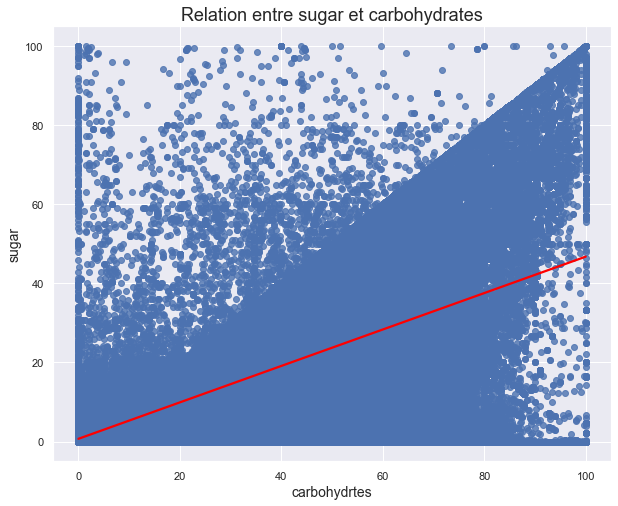

In [730]:
plt.figure(figsize=(10,8))
sns.regplot(y=food_modif_knn['sugars_100g'], x=food_modif_knn["carbohydrates_100g"],ci = None,line_kws = {"color": "red"})
plt.title("Relation entre sugar et carbohydrates",size=18)
plt.ylabel("sugar",size=14)
plt.xlabel("carbohydrtes",size=14)
plt.show()

### Test ANOVA paramétrique

In [731]:
food_anova = food_modif_knn

In [732]:
nutriscore_range = food_anova['energy_100g'].max()-food_anova['energy_100g'].min()
print('espacement des groupes :',nutriscore_range/5)

espacement des groupes : 717.2


In [733]:
starting_value = 0

gap = 717.2
bins=[]
for i in range(6):
    bins.append(starting_value+i*gap)
labels=['grp1','grp2','grp3','grp4','grp5']


food_anova['binned'] = pd.cut(food_anova['energy_100g'], bins=bins, labels=labels)
food_anova.head()


,energy_100g,fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,nutrition-score-fr_100g,binned
1,2243.0,28.57,64.29,14.29,3.57,14.0,grp4
2,1941.0,17.86,60.71,17.86,17.86,0.0,grp3
3,2540.0,57.14,17.86,3.57,17.86,12.0,grp4
4,1552.0,1.43,77.14,3.86,8.57,4.2,grp3
5,1933.0,18.27,63.46,11.54,13.46,4.4,grp3


In [734]:
bins

[0.0, 717.2, 1434.4, 2151.6000000000004, 2868.8, 3586.0]

In [735]:
col_anova = ["nutrition-score-fr_100g","fat_100g","carbohydrates_100g","sugars_100g","proteins_100g"]
F, p = stats.f_oneway(food_anova.loc[food_anova["binned"] == 'grp1',col_anova],
                      food_anova.loc[food_anova["binned"] == 'grp2',col_anova],
                      food_anova.loc[food_anova["binned"] == 'grp3',col_anova],
                      food_anova.loc[food_anova["binned"] == 'grp4',col_anova],
                      food_anova.loc[food_anova["binned"] == 'grp5',col_anova])
F,p

(array([33369.68453054, 85064.34861363, 52101.20377458, 10620.47020899,
         7041.38932185]),
 array([0., 0., 0., 0., 0.]))

In [736]:
results_anova =pd.DataFrame(columns=['F','P_value'])
for i in range(len(col_anova)):
    results_anova.loc[col_anova[i]]=[F[i],p[i]]
results_anova   

,F,P_value
nutrition-score-fr_100g,33369.684531,0.0
fat_100g,85064.348614,0.0
carbohydrates_100g,52101.203775,0.0
sugars_100g,10620.470209,0.0
proteins_100g,7041.389322,0.0


### Test de Kruskal-wallis non paramétrique

In [737]:

statistic,pvalue = stats.kruskal(food_anova.loc[food_anova["binned"] == 'grp1',col_anova],
                      food_anova.loc[food_anova["binned"] == 'grp2',col_anova],
                      food_anova.loc[food_anova["binned"] == 'grp3',col_anova],
                      food_anova.loc[food_anova["binned"] == 'grp4',col_anova],
                      food_anova.loc[food_anova["binned"] == 'grp5',col_anova])
statistic,pvalue

(array([ 86105.81260163, 107500.06930096,  99640.54962323,  24577.39506439,
         41793.35795926]),
 array([0., 0., 0., 0., 0.]))

In [738]:
results_kruskal =pd.DataFrame(columns=['statistic','pvalue'])
for i in range(len(col_anova)):
    results_kruskal.loc[col_anova[i]]=[statistic[i],pvalue[i]]
results_kruskal  

,statistic,pvalue
nutrition-score-fr_100g,86105.812602,0.0
fat_100g,107500.069301,0.0
carbohydrates_100g,99640.549623,0.0
sugars_100g,24577.395064,0.0
proteins_100g,41793.357959,0.0


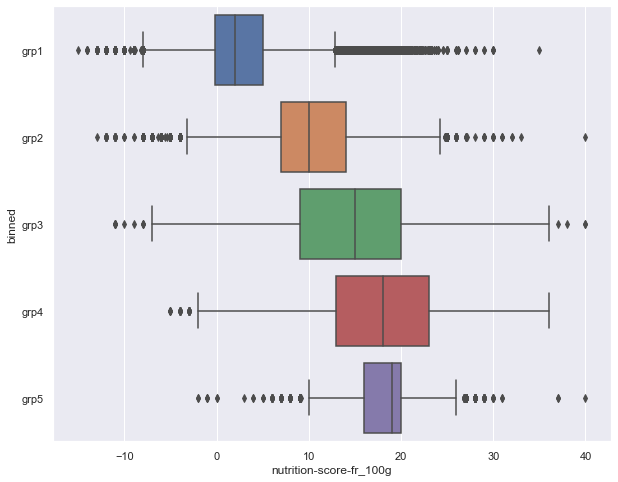

In [739]:
plt.figure(figsize=(10,8))
sns.boxplot(y='binned',x='nutrition-score-fr_100g',data=food_anova)
plt.show()

## Analyse en composante principale : ACP 

In [740]:
df_acp = food_modif_knn.copy()
df_acp.drop(columns=['binned'],inplace=True)
df_acp.head()

,energy_100g,fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,nutrition-score-fr_100g
1,2243.0,28.57,64.29,14.29,3.57,14.0
2,1941.0,17.86,60.71,17.86,17.86,0.0
3,2540.0,57.14,17.86,3.57,17.86,12.0
4,1552.0,1.43,77.14,3.86,8.57,4.2
5,1933.0,18.27,63.46,11.54,13.46,4.4


In [741]:
to_standard = df_acp.values
to_standard
scaler= StandardScaler()
standard = scaler.fit_transform(to_standard)
standard

array([[ 1.49496575e+00,  9.51632918e-01,  1.16088707e+00,
        -5.89697548e-02, -4.55450644e-01,  5.41011149e-01],
       [ 1.09285778e+00,  3.03170967e-01,  1.03187223e+00,
         1.19168419e-01,  1.35774372e+00, -1.08213303e+00],
       [ 1.89041631e+00,  2.68147026e+00, -5.12341668e-01,
        -5.93883263e-01,  1.35774372e+00,  3.09133409e-01],
       ...,
       [-5.41147445e-03, -2.04707011e-02,  1.54053466e-02,
         2.34723552e-02,  6.34328336e-04, -1.50686144e-02],
       [-1.49155142e+00, -7.78204425e-01, -1.15597435e+00,
        -7.72021437e-01, -9.08432020e-01, -1.08213303e+00],
       [ 1.29391177e+00, -7.78204425e-01, -1.15597435e+00,
        -7.72021437e-01, -9.08432020e-01,  8.65639984e-01]])

In [742]:
pca = PCA()
df_acp = pca.fit_transform(standard)

In [743]:
var_ratio = pca.explained_variance_ratio_

#### Ratio par composante en pourcentage

In [744]:
scree = (pca.explained_variance_ratio_*100).round(2)
scree

array([43.88, 27.92, 13.99,  8.67,  4.55,  1.  ])

#### Ration cumulé en pourcentage

In [745]:
scree_cum = scree.cumsum().round()
scree_cum

array([ 44.,  72.,  86.,  94.,  99., 100.])

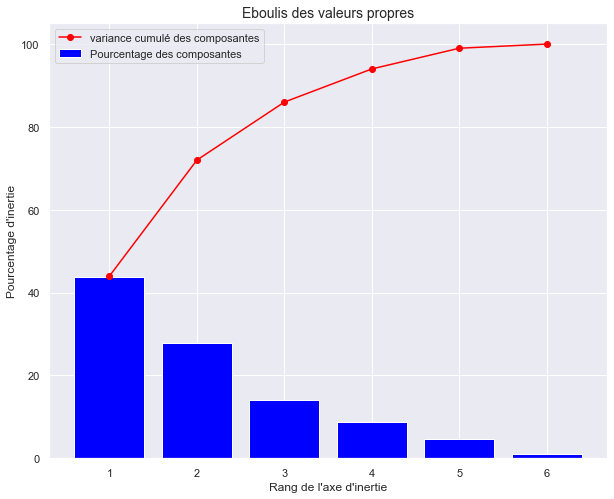

In [746]:
n_components = 6

x_list = range(1, n_components+1)
list(x_list)

plt.figure(figsize=(10,8))
plt.bar(x_list, scree,label= 'Pourcentage des composantes', color = 'blue')
plt.plot(x_list, scree_cum,label = 'variance cumulé des composantes',c="red",marker='o')
plt.xlabel("Rang de l'axe d'inertie")
plt.ylabel("Pourcentage d'inertie")
plt.title("Eboulis des valeurs propres",size = 14)
plt.legend()
plt.show()

les 3 premières composantes représentent 86% des valeurs ce qui semble suffisant

[0.56427486 0.38309439 0.37962827 0.3723637  0.10873438 0.49013983] 
 [ 0.17216965  0.4823972  -0.45757266 -0.51701098  0.50739847  0.05936534]


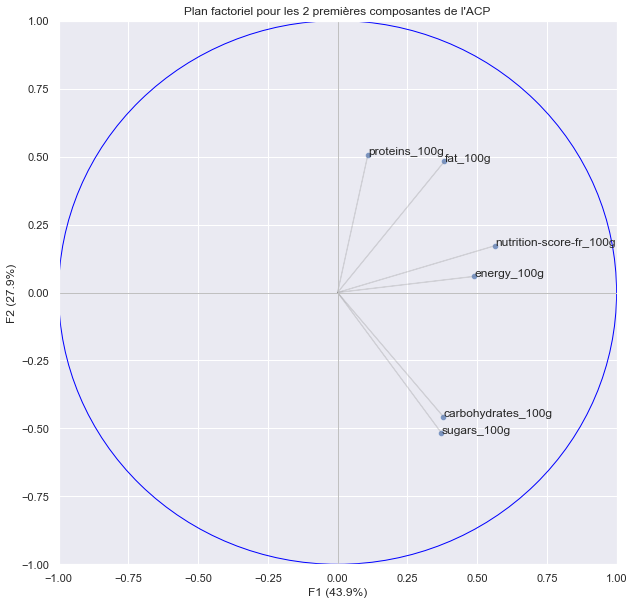

In [747]:
xpca =pca.components_[0,:]
ypca =pca.components_[1,:]
col_pca = ["nutrition-score-fr_100g","fat_100g","carbohydrates_100g","sugars_100g","proteins_100g","energy_100g"]
print(pca.components_[0,:],'\n',pca.components_[1,:])
fig, axes = plt.subplots(figsize=(10,10))

plt.title("Plan factoriel pour les 2 premières composantes de l'ACP")
plt.xlabel('F1 ({}%)'.format(np.around(var_ratio[0]*100,1)))
plt.ylabel('F2 ({}%)'.format(np.around(var_ratio[1]*100,1)))

axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)

plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

sns.scatterplot(x= xpca, y= ypca ,alpha = 0.7)

for i in range(len(col_pca)):
    plt.annotate(col_pca[i], (xpca[i],ypca[i]))
    axes.arrow(0, 0, xpca[i], ypca[i], head_width=0, head_length=0, fc='grey', ec='grey',alpha=0.2)

[0.56427486 0.38309439 0.37962827 0.3723637  0.10873438 0.49013983] 
 [ 0.17216965  0.4823972  -0.45757266 -0.51701098  0.50739847  0.05936534]


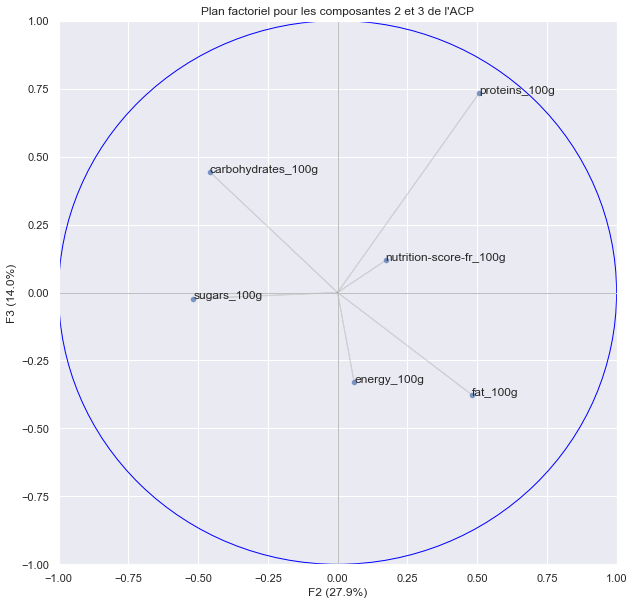

In [748]:
xpca =pca.components_[1,:]
ypca =pca.components_[2,:]

print(pca.components_[0,:],'\n',pca.components_[1,:])
fig, axes = plt.subplots(figsize=(10,10))

plt.title("Plan factoriel pour les composantes 2 et 3 de l'ACP")
plt.xlabel('F2 ({}%)'.format(np.around(var_ratio[1]*100,1)))
plt.ylabel('F3 ({}%)'.format(np.around(var_ratio[2]*100,1)))

axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)

plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

sns.scatterplot(x= xpca, y= ypca ,alpha = 0.7)

for i in range(len(col_pca)):
    plt.annotate(col_pca[i], (xpca[i],ypca[i]))
    axes.arrow(0, 0, xpca[i], ypca[i], head_width=0, head_length=0, fc='grey', ec='grey',alpha=0.2)

In [749]:
def determine_quality(row):
    # Vérifier les conditions pour les colonnes respectives
    if 45 <= row['carbohydrates_100g'] <= 65 and 10 <= row['proteins_100g'] <= 30 and 25 <= row['fat_100g'] <= 35:
        return 'good'
    else:
        return 'not good'

# Appliquer la fonction determine_quality à chaque ligne du DataFrame pour créer la nouvelle colonne 'quality'
food_modif_knn['quality'] = food_modif_knn.apply(determine_quality, axis=1)

# Afficher le DataFrame mis à jour avec la nouvelle colonne 'quality'
food_modif_knn

,energy_100g,fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,nutrition-score-fr_100g,binned,quality
1,2243.000000,28.570000,64.290000,14.290000,3.57000,14.000000,grp4,not good
2,1941.000000,17.860000,60.710000,17.860000,17.86000,0.000000,grp3,not good
3,2540.000000,57.140000,17.860000,3.570000,17.86000,12.000000,grp4,not good
4,1552.000000,1.430000,77.140000,3.860000,8.57000,4.200000,grp3,not good
5,1933.000000,18.270000,63.460000,11.540000,13.46000,4.400000,grp3,not good
...,...,...,...,...,...,...,...,...
320758,1116.153601,12.514733,32.504318,15.942191,7.16446,9.203681,grp2,not good
320763,21.000000,0.200000,0.500000,0.500000,0.50000,2.000000,grp1,not good
320765,1116.153601,12.514733,32.504318,15.942191,7.16446,9.203681,grp2,not good
320768,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,NaN,not good


In [750]:
comptage_qualite = food_modif_knn['quality'].value_counts()
comptage_qualite

not good    246861
good          1796
Name: quality, dtype: int64

In [751]:
groupes_qualite_counts = food_modif_knn.groupby(['binned', 'quality']).size()

In [752]:
comptage_qualite_par_groupe = groupes_qualite_counts.unstack()
comptage_qualite_par_groupe

quality,good,not good
binned,,
grp1,4,81711
grp2,16,68901
grp3,1246,66791
grp4,530,19468
grp5,0,3369


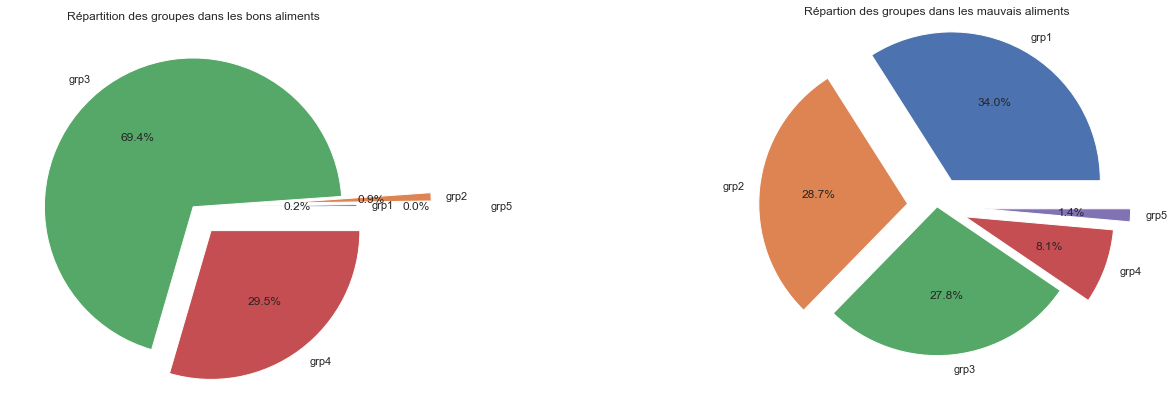

In [753]:
plt.figure(figsize=(20,12))
plt.gcf().subplots_adjust( wspace = 1)

plt.subplot(1,2,1)
labels = comptage_qualite_par_groupe.index
sizes = comptage_qualite_par_groupe['good']
explode= 0.1,0.6,0,0.2,0.9
plt.title('Répartition des groupes dans les bons aliments',size=12,pad=1)
plt.pie(sizes, labels=labels,autopct='%1.1f%%',explode=explode)

plt.subplot(1,2,2)

labels = comptage_qualite_par_groupe.index
sizes1 = comptage_qualite_par_groupe['not good']
explode1= 0.2,0.2,0,0.2,0.3
plt.title('Répartion des groupes dans les mauvais aliments',size=12)
plt.pie(sizes1, labels=labels,autopct='%1.1f%%',explode=explode1)

plt.show()

In [754]:
data_food['quality'] = data_food.apply(determine_quality, axis=1)

qualite_food = data_food['quality'].value_counts()
qualite_food

not good    318926
good          1846
Name: quality, dtype: int64

In [755]:
data_food_good = data_food[data_food['quality'] == 'good'][['product_name','energy_100g','nutrition-score-fr_100g','quality']]
data_food_good

,product_name,energy_100g,nutrition-score-fr_100g,quality
21,Antioxidant Mix - Berries & Chocolate,2092.0,15.0,good
33,Seventh Heaven Organic Trail Mix,2092.0,NaN,good
37,Aunt Maple's Crunchy Granola,2092.0,NaN,good
59,Coconut Almond Granola,2054.0,12.0,good
89,"Foods, Honey Roast Nuts & Fruit Mix",2176.0,11.0,good
...,...,...,...,...
318921,Dairy Milk Roast Almond,2300.0,26.0,good
319866,"Danny's, Peanut Crunch",2105.0,17.0,good
320168,Black Chia,2146.0,NaN,good
320169,White Chia,2146.0,NaN,good


### Code pour la création de QR code avec les données de nom de produit, l'energy, le nutri-score et la qualité pour les sportifs

In [756]:
# Fonction pour générer un code QR pour chaque URL et sauvegarder l'image
#def generate_qr_code(row):
    #qr = qrcode.QRCode(
       # version=1,
       # error_correction=qrcode.constants.ERROR_CORRECT_L,
       # box_size=10,
       # border=4,
   # )
   # data = f"Product Name: {row['product_name']}\nEnergy_100g: {row['energy_100g']}\nNutrition Score: {row['nutrition-score-fr_100g']}\nQuality: {row['quality']}"
    #qr.add_data(data)
   # qr.make(fit=True)
   # img = qr.make_image(fill_color="black", back_color="white")
   # img.save(f"qr_code_{row.name}.png")

# Appliquer la fonction à chaque ligne du DataFrame pour générer les codes QR
#data_food.apply(generate_qr_code, axis=1)